In [27]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)


In [6]:
# Import Data
zindi = pd.read_pickle('data/train_process.pkl')
zindi.shape

(15539, 771)

In [11]:
#fillna
zindi = zindi.fillna(zindi.mean())

/var/folders/gz/t1kyprv95tzc2bf6b375z94h0000gn/T/ipykernel_3903/4079382883.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zindi = zindi.fillna(zindi.mean())


In [12]:
zindi.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,...,0.787561,195.630470,1.027146,89.138075,23.011402,0.155799,0.786130,195.391908,1.025302,89.151188
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561000,0.797333,296.967254,1.019167,90.529167
2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,...,0.437917,195.630470,1.027146,88.415833,23.011402,0.155799,0.786130,195.391908,1.025302,89.151188
3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,...,0.766417,195.630470,1.027146,88.490833,24.641667,0.000000,0.719667,195.391908,1.025302,88.465833
4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,...,0.787561,195.630470,1.027146,89.138075,23.011402,0.155799,0.786130,195.391908,1.025302,89.151188


In [24]:
columns_to_drop = ['ID', 'location', 'target']
# define features and target
X = zindi.drop(columns_to_drop, axis=1)
y = zindi.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (15539, 768)
y: (15539,)
X_train: (10877, 768)
y_train: (10877,)
X_test: (4662, 768)
y_test: (4662,)


In [36]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [39]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [41]:
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 34.06
RSME _ test: 37.29
RSME _ train_scaled: 34.06
RSME _ test_scaled: 37.29


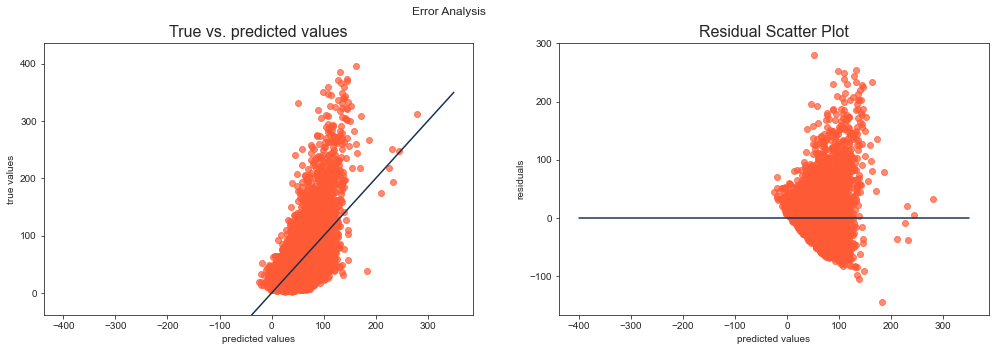

In [43]:
# error analysis train:
error_analysis(y_train, y_pred_train)

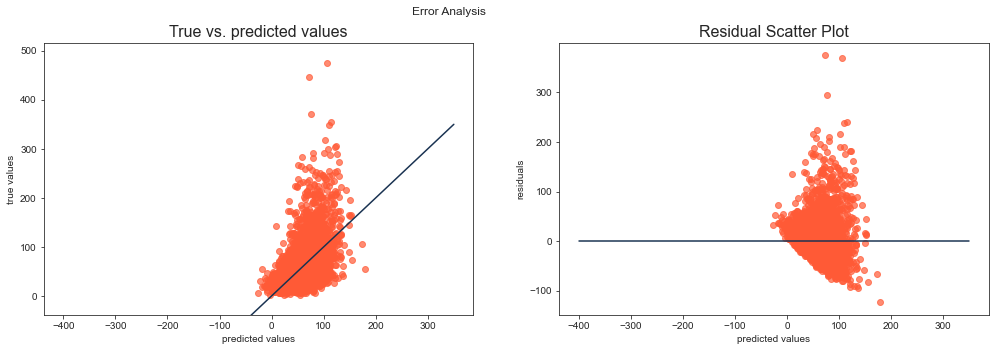

In [44]:
# error analysis test:
error_analysis(y_test, y_pred_test)

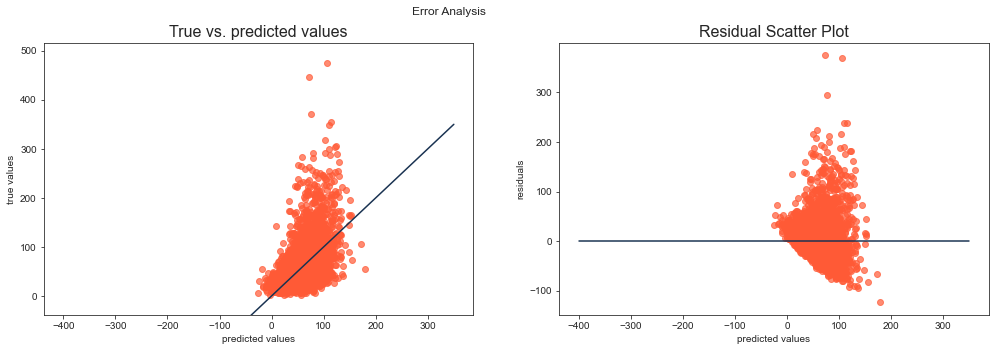

In [49]:
# error analysis test:
error_analysis(y_test, y_pred_test_scaled)